In [13]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [17]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [18]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [19]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [20]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [21]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [11]:
train_data.targets.size()

torch.Size([60000])

In [22]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [25]:
from torch.utils.data import DataLoader

loaders = {

    'train' : DataLoader(train_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1
    ),

    'test' : DataLoader(test_data,
                         batch_size=100,
                         shuffle=True,
                         num_workers=1
    ),
}

In [26]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

    def_init_(self):
        super(CNN, self)._init_()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = F.view(-1, 320)
        x = F.relu(self.fcl(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

SyntaxError: invalid syntax (3421849350.py, line 7)

In [27]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)  # Corrected to use x.view
        x = F.relu(self.fc1(x))  # Corrected self.fcl to self.fc1
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x, dim=1)  # Added dim=1 for softmax


In [29]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')


def test():
    model.eval()  # Set the model to evaluation mode

    test_loss = 0
    correct = 0

    with torch.no_grad():  # No need to compute gradients during testing
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)  # Move data and target to the appropriate device
            output = model(data)  # Get model predictions
            test_loss += loss_fn(output, target).item()  # Accumulate loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()  # Count correct predictions

    test_loss /= len(loaders['test'].dataset)  # Calculate average loss

    accuracy = 100. * correct / len(loaders['test'].dataset)  # Calculate accuracy
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. *correct / len(loaders["test"].dataset):.0f}%\n')


In [30]:
for epoch in range(1, 11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303349
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.286038
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.207223
Train Epoch: 1 [6000/60000 (10%)]	Loss: 2.000471
Train Epoch: 1 [8000/60000 (13%)]	Loss: 1.933598
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.814113
Train Epoch: 1 [12000/60000 (20%)]	Loss: 1.808788
Train Epoch: 1 [14000/60000 (23%)]	Loss: 1.847966
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.757896
Train Epoch: 1 [18000/60000 (30%)]	Loss: 1.727346
Train Epoch: 1 [20000/60000 (33%)]	Loss: 1.785586
Train Epoch: 1 [22000/60000 (37%)]	Loss: 1.713832
Train Epoch: 1 [24000/60000 (40%)]	Loss: 1.686790
Train Epoch: 1 [26000/60000 (43%)]	Loss: 1.685197
Train Epoch: 1 [28000/60000 (47%)]	Loss: 1.680573
Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.591515
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.637545
Train Epoch: 1 [34000/60000 (57%)]	Loss: 1.604409
Train Epoch: 1 [36000/60000 (60%)]	Loss: 1.625784
Train Epoch: 1 [38000/60000 (63%)]	Loss: 1.629785
Train Epoch

In [31]:
device

device(type='cpu')

Predicition: 0


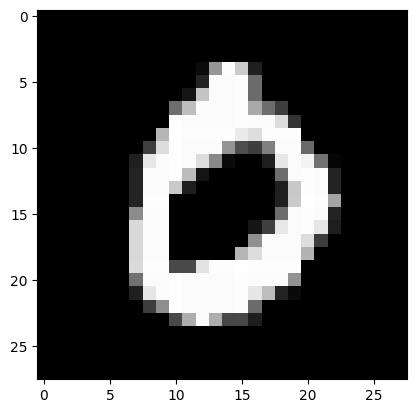

In [35]:
import matplotlib.pyplot as plt
import torch

# Set the model to evaluation mode
model.eval()

# Get a test data sample (assuming `test_data` is a DataLoader or similar object)
data, target = test_data[3]  # Retrieve the first test sample

# Prepare the data (unsqueeze to add batch dimension and move to the correct device)
data = data.unsqueeze(0).to(device)

# Perform the prediction
output = model(data)

# Get the predicted class (argmax across the output dimension)
prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Predicition: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()
